In [1]:
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

from functionality.dataset import *
from functionality.metrics_portfolio import BacktestUtility, get_max_drawdown_fast
from functionality.Bots.portfolio_bot import PortfolioStrategie

dict_parameters = {
'interval': {'minutes': 60, 'seconds': 0}, # candles we use
'period': {'days': 2, 'minutes': 0}, 
'n_coins_to_choose': 4, # total coins we choose for trading
'n_coins_to_store':  1, # number of coins we store for the next period of trade, 
                        # we choose best among which we traded
'percentage_down':  60, # filter criterio
'starting_budget': 100,
'filt': True
}

dataset = Dataset(interval=dict_parameters['interval'])
dataset._get_data()
dataset.slice_data('2017-08-17', '2021-06-12') # start/end date for backtest
dataset._expanding_data_array()

dict_parameters.pop('interval')

DD = PortfolioStrategie(dataset, **dict_parameters)
# DD.make_grid()


In [2]:
DD.main()
DD.initialize_metrics_class()


C:\Users\1\Documents\GitHub\trading\functionality\Bots\portfolio_bot.py:40: RuntimeWarning: invalid value encountered in long_scalars
  return np.sum(profit[profit != 1] < 1)/len(profit[profit != 1])
100%|██████████████████████████████████████| 696/696 [00:00<00:00, 1127.97it/s]


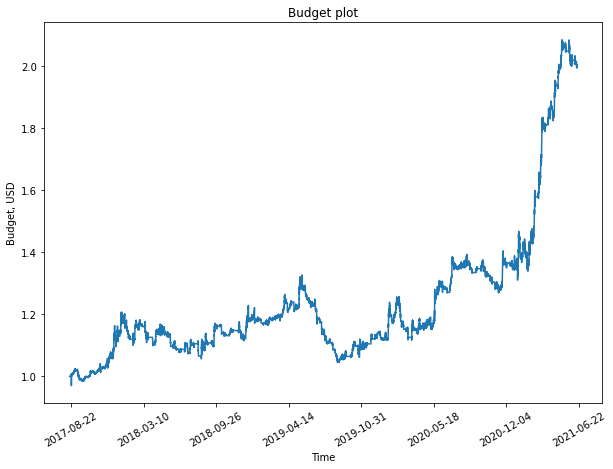

In [3]:
DD.MC.budget_plot(log_scale=True)

In [7]:
# dataset.update_data_file()
